# Gas compressibility (see GasCompressibilityJT for extensions with JT cooling)
We now investigate correlations for gas compressibility factors $Z$.
The key sources are:
1. Ding-Yu Peng & Donald B. Robinson, **A New Two-Constant Equation of State**, *Ind. Eng. Chem. Fundam., Vol. 15, No. 1*, 1976
[link](https://pubs.acs.org/doi/abs/10.1021/i160057a011)
1. Azad Jarrahian, Babak Aghel, Ehsan Heidaryan, **On the viscosity of natural gas**, *Fuel 150 Pp 609–618*, 2015 [link](https://www.sciencedirect.com/science/article/pii/S0016236115001970)

## Extensions to non-ideal gases
We start by decomposing pressure into a repulsive and attractive component motivated by non-ideal kinetic theory and an inter-molecular attractive force.

$$ P = P_R + P_A = \frac{RT}{V-b} - \frac{a}{g(V)} $$ 
where $b$ is related to the size of the 'hard' molecules (independent of $T$), $a$ is a representation of the inter-molecular attraction (and is a function of $T$). $g(V)$ is a function of the molar volume, $V$. Peng and Robinson suggest that:
$$P = \frac{RT}{V-b} - \frac{a(T)}{V(V+b)+b(V-b)} ~~~~~~~~~~~~~~~\textsf{Eqn: PR}$$ 

>  *Compare Van der Waal's forces which can be written as: $\left (P+\frac{n^2a}{V^2} \right ) \left (V-nb \right )=nRT $.
This has the analytic solution $a=\frac{27n^2R^2T_c^2}{64P_c}(4-3n^2)$ and $b=\frac{RT_c}{8P_c}(4-3n^2)$. For $n=1$ we have $a=0.421875\frac{R^2T_c^2}{P_c}$ and $b=0.125\frac{RT_c}{P_c}$; compare the PR values obtained below.*

We introduce $Z = \frac{PV}{RT}$ we can write:
$$Z^3 - (1-B)Z^2 + (A-3B^2 -2B) Z - (AB -B^2 - B^3) = 0$$
where 
$ A = \frac{aP}{(RT)^2}, B = \frac{bP}{RT} $

Of course, we can write this as:
$$
Z^3 - Z^2 + [ B Z^2 + (A-3B^2 -2B) Z - (AB -B^2 - B^3) ] = 0 
$$
which is consistant with the statement that $Z = 1$ for an ideal gas (because $ a = b = 0$ for an *ideal* gas).

At the critical point we have:
$$ \left. \frac{\partial P}{\partial V} \right |_T = 0 ~~\textsf{and}~~  \left. \frac{\partial^2 P}{\partial V^2} \right |_T = 0$$ which leads to:
$$
a(T_c) = 0.45724 \frac{R^2T_c^2}{P_c} , ~~b(T_c) = 0.07780 \frac{RT_c}{P_c} ~~\textsf{and}~~ Z_c = 0.307 
$$

At other temperatures it is reasonable to write: $b(T) = b(T_c)$ (a constant)
and $a(T) = a(T_c)\times\alpha(T_r,\omega)$ 

where $T_r = T/T_c$ is the reduced temperature and $\omega$ is an 'acentric' factor; clearly we need $\alpha(1,\omega) \equiv 1 ~~~~\forall~ \omega$.

Comparison with experimental data gives:
\begin{align}
\sqrt{\alpha} = 1 + \kappa \left(1 -T_r^{\frac{1}{2}}\right)
\end{align}
with:
$$\kappa = 0.37464 + 1.54226\omega - 0.26992 \omega^2 $$
Values of $\omega$ can be found from this graph taken from Peng and Robinson (Figure 2).
_(This data is also available in tabular form at: [Reid et al.](http://www.kaylaiacovino.com/Petrology_Tools/Critical_Constants_and_Acentric_Factors.htm))_
<img src="https://github.com/mm002a/JupyterNotebooks-V0.0/blob/main/DocPengRobDiag.png?raw=1" />  
This derivation shows __the Law of Corresponding States__: all fluids behave similarly when described in terms of their reduced temperature and pressure ($T_r$ and $P_r$).

__Status__ 28/4/2020
-   Summarised the Peng and Robinson Paper.
-   Verified the math and aritmetic at the critical point.
   -      included notes on Van der Waal's equation
-   Computed the compressibilities of methane and ethane (correctly?).
Possible Extensions and Future Work.
  -   Talk about mixtures (including mixtures with $CO_2$ and $H_2S$).  
    Wichert, E. and Aziz, K. 1972. **Calculate Z's for Sour Gases.** Hydrocarbon Processing 51 (May): 119–122.
    -   Talk about additional correlations.
    -   Add sheet about equations of state and gas viscosity $\mu_g$.
    -   Clean-up the code and comments (in progress)


## Compressibility of Methane and Ethane for the Frigg pipeline conditions.

In [ ]:
import math
from scipy import optimize

def PRZP3(Z, XARGS =[0.4572355289212813, 0.07779607390386772, 1]):
    """
    Evaluate the Peng-Robinson polynomial for the non-dimensional compressibility (Z):
    P(Z,A,B) = Z^3 -(1-B)Z^2 + (A-3B^2-2B)Z-(AB-B^2-B^3)
    Try:
    A=B=0 (the ideal gas case) => Z=0
    and
    PolyZ(0.307,0.45724,0.07780) =0 The coefficients in the PR paper evaluated at the critical point.
    """
    Acap=XARGS[0]; Bcap=XARGS[1]; DEBUG=XARGS[2]
    PRZ3 = Z**3 - (1-Bcap)*Z**2 + (Acap-3*Bcap**2 - 2*Bcap)*Z -( Acap*Bcap - Bcap**2 - Bcap**3)
    if DEBUG: print("Z=",Z," A=",Acap," B=",Bcap,"PRCubic=",PRZ3)
    return PRZ3
Acap=Bcap=0.0; Z=1.0
XARGS= [Acap, Bcap,1]
print("Ideal Gas (PR cubic should be 0.0):",PRZP3(1.0, XARGS))
Acap=0.4572355289212813 # optimal value x[1], from below
Bcap=0.07779607390386772 # optimal value x[2], from below
XARGS= [Acap, Bcap,1]
print("XARGS: ",XARGS[0],XARGS[1],XARGS[2])
print("Critical Point (PR cubic should be 0.0):",PRZP3(0.30740131,XARGS))


R = 8.314413 # The ideal gas constant
print("\nCompressibility of Methane")
#R. C. Reid, J. M. Prausnitz, & B. E. Poling, 1987, The Properties of Gases & Liquids, 4th Ed. New York: McGraw-Hill
#    http://www.kaylaiacovino.com/Petrology_Tools/Critical_Constants_and_Acentric_Factors.htm

omega = 0.0115              # acentric factor for methane
kappa = 0.37464+1.54226*omega-0.26992*omega**2
Tc = 191.15; Pc = 4.641E6   # Methane critical point properties
T= 313 ; P = 13.01E6        # Frigg pipeline conditions (Case 9) Frigg - MCP01
Tr = T/Tc; Pr = P/Pc        #Compute reduced temperature and pressure
print("Case 9: T =:",T,"K, P =",P,"Pa")
alpha = (1+kappa*(1-math.sqrt(Tr)))**2
Acap = (0.4572355289212813*Pr*alpha)/Tr**2 # Use improved values for A and B
Bcap = (0.07779607390386772*Pr)/Tr
zx=optimize.fsolve(PRZP3,[1], [Acap, Bcap,0],full_output=0)
print("The compressibility of methane at Frigg conditions is:", zx)
#
#
print("\nCompressibility of Ethane")
omega = 0.099              # acentric factor for ethane
kappa = 0.37464+1.54226*omega-0.26992*omega**2
Tc = 305.4; Pc = 4.88E6    # Ethane critical point properties
T= 313 ; P = 13.01E6       # Frigg pipeline conditions (Case 9) Frigg - MCP01
Tr = T/Tc; Pr = P/Pc       #Compute reduced temperature and pressure
print("Case 9: T =:",T,"K, P =",P,"Pa")
alpha = (1+kappa*(1-math.sqrt(Tr)))**2
Acap = (0.4572355289212813*Pr*alpha)/Tr**2   # Use improved values for A and B
Bcap = (0.07779607390386772*Pr)/Tr
zx=optimize.fsolve(PRZP3,1, [Acap, Bcap,0],full_output=0)
print("The compressibility of ethane at Frigg conditions is:", zx)

Z= 1.0  A= 0.0  B= 0.0 PRCubic= 0.0
Ideal Gas (PR cubic should be 0.0): 0.0
XARGS:  0.4572355289212813 0.07779607390386772 1
Z= 0.30740131  A= 0.4572355289212813  B= 0.07779607390386772 PRCubic= -3.5388358909926865e-15
Critical Point (PR cubic should be 0.0): -3.5388358909926865e-15

Compressibility of Methane
Case 9: T =: 313 K, P = 13010000.0 Pa
The compressibility of methane at Frigg conditions is: [0.83924289]

Compressibility of Ethane
Case 9: T =: 313 K, P = 13010000.0 Pa
The compressibility of ethane at Frigg conditions is: [0.39788793]


#### Other resources
For methane: [USGS web page](https://pubs.usgs.gov/of/2005/1451/equation.html):
$\omega = 0.0115, T_c = 191.15K, P_c = 4.641 MPa$
The ideal gas constant $R = 8.314413 J mol^{-1}K^{-1}$

For enthalpy diagrams of other fluids see this [on-line worksheet](https://www.questconsult.com/thermo/enthalpy_pressure_diagram.html):

This data is available in tabular form at: [Reid et al.](http://www.kaylaiacovino.com/Petrology_Tools/Critical_Constants_and_Acentric_Factors.htm)

Taken from:
R. C. Reid, J. M. Prausnitz, and B. E. Poling, 1987, The Properties of Gases and Liquids, 4th Ed. New York: McGraw-Hill

 #### Other relevant web sites
1.  https://engineeringunits.com/compressibility-factor-calculator-z/
1.  https://petrowiki.org/Real_gases - poor
3.  https://checalc.com/solved/naturalgasZ.html
4.  https://pubs.usgs.gov/of/2005/1451/equation.html (Peng-Robinson equation of state)
5.  http://www.kaylaiacovino.com/Petrology_Tools/Critical_Constants_and_Acentric_Factors.htm
1.  https://engineeringunits.com/compressibility-factor-z-factor/ (Deals with mixtures e.g. Kay's rule - worth a look.)
1.  http://www.peacesoftware.de/einigewerte/methan_e.html (Compressibility factors - and other thermodynamic properties - for a few interesting gases.)

## Notes on Peng Robinson coefficients at the critical point

First let's evaluate the basic polynomial:
$ PR(Z) \equiv Z^3 - Z^2 + [ B Z^2 + (A-3B^2 -2B) Z - (AB -B^2 - B^3) ] = 0 $

In [ ]:
def PolyZ(Z, A, B):
    """
    Evaluate the Peng-Robinson polynomial for the non-dimensional compressibility (Z):
    P(Z,A,B) = Z^3 -(1-B)Z^2 + (A-3B^2-2B)Z-(AB-B^2-B^3)
    Validation tests:
    A=B=0 (the ideal gas case) => Z=0
    and
    PolyZ(0.307,0.45724,0.07780) =0 The coefficients in the PR paper evaluated at the critical point.
    """
    PZ = Z**3 - (1-B)*Z**2 + (A-3*B**2 - 2*B) *Z -( A*B - B**2 - B**3)
    print("Z=",Z," A=",A," B=",B,"ANS=",PZ)
    return PZ
print("Ideal Gas ",PolyZ(1,0,0))
print("Critical Point ",PolyZ(0.307,0.45724,0.07780))

Z= 1  A= 0  B= 0 ANS= 0
Ideal Gas  0
Z= 0.307  A= 0.45724  B= 0.0778 ANS= -2.691488000014508e-06
Critical Point  -2.691488000014508e-06


#### Notes on PR coefficients at the critical point - the first derivative
<a id='Notes1'></a>
We differentiate Eqn:PR with respect to V:

\begin{align}
\left . \frac{\partial P}{\partial V} \right |_T &= - \frac{RT}{(V-b)^2} + 2a \frac{(V + b)}{(V^2+2bV-b^2)^2}\\ 
\end{align}

which can be written in normalised form as:
\begin{align}
- PositiveFn \times \frac{P^4}{(RT)^5}\left .\frac{\partial P}{\partial V} \right |_T = \{ 2A (Z+B)(Z-B)^2 - (Z^2 + 2BZ -B^2)^2 \}
\end{align}

Evaluating this at the critical point we have: 
$
\left .\frac{\partial P}{\partial V} \right |_T = 0 
$
which is satisfied by the coefficients and value given above.

In [ ]:
def DPolyZ(Z,A,B):
    """
    This function evaluates the RHS of the above equation for DP/DV.
    Usage: DPolyZ(Z-compressibility, A, B - non-dimensional constants from Peng Robinson)
    Validation test: It should be zero at the critical point.
    """
    DPZ = 2*A*(Z+B)*(Z-B)**2 - (Z**2 + 2*B*Z - B**2)**2
    return DPZ
print("Gradient at Critical Point ",DPolyZ(0.307,0.45724,0.07780))
print("Gradient at Critical Point ",DPolyZ(3.07401e-01,4.57236e-01,7.77961e-02))

Gradient at Critical Point  -7.684081830341971e-07
Gradient at Critical Point  1.290313487653516e-08


#### Notes on PR coefficients at the critical point - the second derivative

We differentiate Eqn:PR **twice** wrt V:

\begin{align}
\left . \frac{\partial^2 P}{\partial V^2} \right |_T &= \frac{2RT}{(V-b)^3} - 2a \frac{(3V^2+6BV + 5b^2)}{(V^2+2bV-b^2)^3}\\ 
\end{align}

which can be written in normalised form as:
\begin{align}
- 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝐹𝑛 \times \frac{RT^2}{P^3}\left .\frac{\partial^2 P}{\partial V^2} \right |_T &= 
2\left \{ -A \frac{3Z^2+6BZ+5B^2}{(Z^2+2BZ - B^2)^3}  + \frac{1}{(Z-B)^3} \right \}\\
&=\left \{ \frac{1}{(Z-B)^3} - A \frac{3Z^2+6BZ+5B^2}{(Z^2+2BZ - B^2)^3} \right \}
\end{align}

Evaluating this at the critical point we have: 
$
\left .\frac{\partial^2 P}{\partial V^2} \right |_T = 0 
$
which is satisfied by the coefficients and value given above.

In [ ]:
def D2PolyZ(Z,A,B):
    """A function to evaluate a multiple of D^2P/DV^2 of the PR equation"""
    D2PZ = 1/(Z-B)**3 - A*(3*Z**2+6*B*Z+5*B**2)/(Z**2+2*B*Z-B**2)**3
    return D2PZ
print("Second Gradient at Critical Point ",D2PolyZ(0.307,0.45724,0.07780),"That's quite small?")
print("Second Gradient at Critical Point ",D2PolyZ(3.07401e-01,4.57236e-01,7.77961e-02),"Very sensitive to rounding!")

Second Gradient at Critical Point  0.04366953294452003 That's quite small?
Second Gradient at Critical Point  -1.7917987406690372e-05 Very sensitive to rounding!


In [ ]:
from scipy import optimize
def func(x):
    """
    A function to evaluate a scaled function of P, DP/DV, D2P/DV2
    when written in the Peng-Robinson notation of:
    Z,A,B
    """
    DEBUG = 0 # 0 => FALSE
#First switch to normal (PR) notation
    Z=x[0]; A=x[1] ; B=x[2]
    F=[1.0,1.0,1.0] # Initialise to some easy to recognize value
#    print("Z,A,B: ",Z,A,B)
#Calculate P
    F[0] = Z**3 - (1-B)*Z**2 +(A-3*B**2-2*B)*Z - (A*B-B**2-B**3)
#Calculate DP/DV
    F[1] = 2*A*(Z+B)*(Z-B)**2 - (Z**2 + 2*B*Z - B**2)**2
#Calculate D2P/DV2
    F[2] = 1/(Z-B)**3 - A*(3*Z**2+6*B*Z+5*B**2)/(Z**2+2*B*Z-B**2)**3
    
    if DEBUG: print("Z,A,B: ",'{:12.5e}'.format(Z),'{:12.5e}'.format(A),'{:12.5e}'.format(B),
          "   F: ",'{:8.2e}'.format(F[0])," DP/DV:",'{:8.1e}'.format(F[1]),"D2P/DV2:",'{:8.1e}'.format(F[2]))

    return F

print("Validation - compressibility for an ideal gas:")
x=x0 = [1.0,0,0]
print("x: ",x, x[0],x[1],x[2])
x=x0 = [0.307,0.45724,0.07780]
print("Validation for PR values (close to critical point) x: ",x, x[0],x[1],x[2])

FN = func(x0)
print("                                   F: ",FN)

print("Behaviour at the critical point - confirms PR result (Eqns. 9,10,11)")
x=optimize.fsolve(func,x0,full_output=0)
print("optimize.fsolve [Z,A,B]",x,"[PR(Z),DP,D^2P]",func(x))
fstring = '{:8.2E}'
print("2.5 optimize.fsolve [Z,A,B]",x,"[PR(Z),DP,D^2P]",end=' ');
for i in range (0,3): print('{:8.2e}'.format(func(x)[i]), end=' ')
print()
print("4   optimize.fsolve [Z,A,B]",x,"[PR(Z),DP,D^2P]",func(x))

Validation - compressibility for an ideal gas:
x:  [1.0, 0, 0] 1.0 0 0
Validation for PR values (close to critical point) x:  [0.307, 0.45724, 0.0778] 0.307 0.45724 0.0778
                                   F:  [-2.691488000014508e-06, -7.684081830341971e-07, 0.04366953294452003]
Behaviour at the critical point - confirms PR result (Eqns. 9,10,11)
optimize.fsolve [Z,A,B] [0.30740131 0.45723553 0.07779607] [PR(Z),DP,D^2P] [-3.5388358909926865e-15, 8.396061623727746e-16, -3.1874947126198094e-11]
2.5 optimize.fsolve [Z,A,B] [0.30740131 0.45723553 0.07779607] [PR(Z),DP,D^2P] -3.54e-15 8.40e-16 -3.19e-11 
4   optimize.fsolve [Z,A,B] [0.30740131 0.45723553 0.07779607] [PR(Z),DP,D^2P] [-3.5388358909926865e-15, 8.396061623727746e-16, -3.1874947126198094e-11]


### Summary

These results show that the coefficients given in the Peng Robinson paper follow directly form the analysis of the gas behaviour around the critical point. Although the results are sensitive to exact values four decimal places for $b(T_cr)$ has a significant effect on the value of $\left . \frac{\partial ^2 P}{\partial V^2} \right |_T$

### CNGA compressibility factor

The California Natural Gas Association gives the following simple formula for the compressibility of natural gas:
$$
Z = \left [ 1+ \frac{3.44400\mathrm{E}5 \times \overline{P}_{psi~g} \times 10^{1.785\gamma}}{\overline{T}_R^{~3.825}} \right ]^{~-1}
$$
in field units(!):
$\overline{P}_{psi~g}$ -- average gas pressure in psig; $\overline{T}_R$ -- average gas temperature in $ ^\circ R$ and $\gamma$ -- specific gravity of the gas. This gives reasonable accuracy for pressures over 100psig ($\approx 0.69MPa$); below this pressure we can take $Z \equiv 1$.

Converting this to SI units, we obtain:
$$
Z = 
\left [ 1+  \frac{344\,400}{6894.75728} \left ( \frac{5}{9}\right )^{3.825} \frac{  \overline{P}_{Pa~g} \times 10^{1.785\gamma}}{\overline{T}_{K}^{~3.825}} \right ]^{~-1}
  = \left [ 1+ \frac{ 5.273838529 \times\overline{P}_{Pa~g} \times 10^{1.785\gamma}}{\overline{T}_{K}^{~3.825}} \right ]^{~-1}
$$
where: $\overline{P}_{Pa~g}$ -- average gas (gauge) pressure in Pa; $\overline{T}_K$ -- average gas temperature in $K$ and $\gamma$ -- specific gravity of the gas.

In [ ]:
import math
from scipy import optimize
def PengRComp(T, P, omega = 0.0115,Tc = 191.15, Pc = 4.641E6, DEBUG=0):
    """
    A function to evaluate the compressibility of a gas using Peng Robinson.
    Default values are for methane.
    Usage: PengRComp(Temp[K], Press[Pa}, omega(acentric factor),Temp(crit pt), Pres(crit pt), DEBUG(0=>False))
    """

    kappa = 0.37464+1.54226*omega-0.26992*omega**2

    Tr = T/Tc; Pr = P/Pc        #Compute reduced temperature and pressure
    alpha = (1+kappa*(1-math.sqrt(Tr)))**2
    Acap = (0.4572355289212813*Pr*alpha)/Tr**2 # Use improved values for A and B
    Bcap = (0.07779607390386772*Pr)/Tr
    PRZ=optimize.fsolve(PRZP3,1,[Acap,Bcap,DEBUG],full_output=0)
    if DEBUG: print("PengRComp - omega: ",omega, "T: ", T," P: ", P," Z: ", PRZ)
    return PRZ
T= 313 ; P = 13.01E6 
PRZX=PengRComp(T,P,DEBUG=0)
print(PRZX, "Should be: 0.83924289")


[0.83924289] Should be: 0.83924289


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# evenly sampled time at 200ms intervals
t = np.arange(-.1, 2.0, 0.05)
zero = t*0
# red dashes, blue squares and green triangles
print("Acap: ",Acap," Bcap: ", Bcap)
plt.plot(t, PRZP3(t,[Acap,Bcap,0]),t,zero,)
#plt.ylabel('PR polynomial')
#plt.xlabel('Compressibility - Z')
plt.show()

Acap:  1.145493977613641  Bcap:  0.20236707289506495


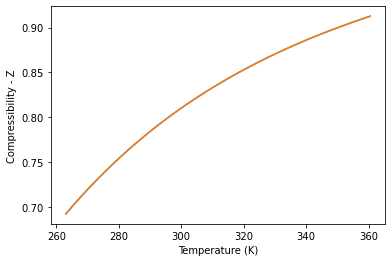

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# evenly sampled time at 200ms intervals
t = np.arange(-1.0,1.0, 0.05)
TEMP = 313+50*t
PRTEMP=zero = t*0
for index in range (len(TEMP)):
    PRTEMP[index]=PengRComp(TEMP[index],P,DEBUG=0)
# red dashes, blue squares and green triangles
print("Acap: ",Acap," Bcap: ", Bcap)
plt.plot(TEMP, PRTEMP,TEMP,zero,)
plt.xlabel('Temperature (K)')
plt.ylabel('Compressibility - Z')
plt.show()